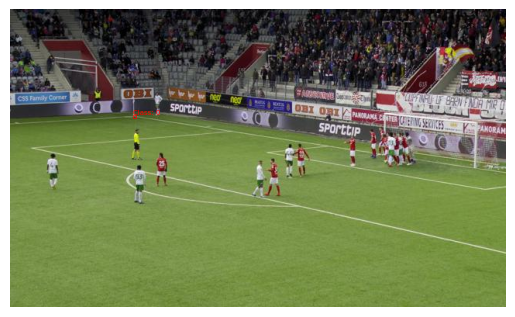

In [3]:
import os
import json
from PIL import Image  # для загрузки и работы с изображениями
import matplotlib.pyplot as plt  # для отображения изображений
import matplotlib.patches as patches  # для добавления графических примитивов (прямоугольников)

# Функция для отображения изображения с аннотациями
def display_image_with_annotations(image_path, label_file):
    # Открываем изображение по указанному пути
    with Image.open(image_path) as img:
        fig, ax = plt.subplots(1)  # Создаем фигуру и ось для отображения изображения
        ax.imshow(img)  # Показываем само изображение на оси

        # Проверяем, существует ли файл с аннотациями
        if os.path.exists(label_file):
            with open(label_file, 'r') as f:
                annotations = f.readlines()  # Читаем все строки из файла аннотаций

            # Проходим по каждой строке аннотаций
            for annotation in annotations:
                # Каждая строка разделяется на части (ID класса и координаты)
                parts = annotation.strip().split()  # Разбиваем строку по пробелам
                class_id = parts[0]  # ID класса (первый элемент строки)
                x_center, y_center, width, height = map(float, parts[1:])  # Центр и размеры (в YOLO формате)

                # Преобразуем координаты из нормализованного формата в абсолютные
                x1 = (x_center - width / 2) * img.width  # Верхний левый угол (x)
                y1 = (y_center - height / 2) * img.height  # Верхний левый угол (y)
                x2 = (x_center + width / 2) * img.width  # Нижний правый угол (x)
                y2 = (y_center + height / 2) * img.height  # Нижний правый угол (y)

                # Рисуем прямоугольник на изображении для аннотации
                rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=0.5, edgecolor='red', facecolor='none')
                ax.add_patch(rect)  # Добавляем прямоугольник на изображение
                # Добавляем текст с указанием ID класса на изображении
                ax.text(x1, y1, f"Class: {class_id}", fontsize=5, color='red') 

        plt.axis('off')  # Отключаем отображение осей
        plt.show()  # Показываем изображение с аннотациями

# Пример использования функции
image_path = "./test/images/SNGS-116/000001.jpg"  # Путь к изображению
label_file = "./test/labels/SNGS-116/000001.txt"  # Путь к файлу аннотаций
display_image_with_annotations(image_path, label_file)  # Вызов функции